<a href="https://colab.research.google.com/github/ms624atyale/Phonetics/blob/main/MFC_PairedT_Levene_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ms624atyale/Phonetics

Cloning into 'Phonetics'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 230 (delta 78), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (230/230), 139.08 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (78/78), done.


###**💦 🌀 <font color = 'green'> **When you need to delete a github repository you have cloned, run the following code.**

import shutil

shutil.rmtree('/content/REPOSITORY_NAME_OR_FOLDER_NAME')

In [121]:
import shutil
shutil.rmtree('/content/Phonetics')

###🐹 🐾 **Convert .Table (from ExperimentMFC on Praat) to .csv format**

In [120]:
import pandas as pd

# Load the .Table file as a tab-separated file
df = pd.read_csv("/FilePath with .Table format", sep="\t") #🍎🍎 Subsitute FilePath with your path of interest

# Save it as a .csv file
df.to_csv("SetYourDirectorywithCorrespondingFile with .csv format", index=False) #🍏🍏 Change file name corresponding to the codeline above

print("✅ Converted successfully!")

✅ Converted successfully!


## 🐹 🐾 **Merge multiple .csv files into one single .csv file**

###🐬 🐬 <font color = 'red'> **Results from the first ExperimentMFC**  1️⃣

In [12]:
%cd /content/Phonetics/Data_Converted2CSV_ExpMFC1

/content/Phonetics/Data_Converted2CSV_ExpMFC1


In [13]:
import pandas as pd
import glob
import os

# ✅ Set your directory path where the 40 CSV files are located
csv_folder = '/content/Phonetics/Data_Converted2CSV_ExpMFC1'  # ← Replace with your actual directory path

# ✅ Pattern to match all CSV files in the folder
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))

# ✅ Create an empty list to store each CSV's DataFrame
df_list = []

# ✅ Loop through and read each CSV
for file in csv_files:
    df = pd.read_csv(file)

    # Optional: Add a column to identify the source file
    df['source_file'] = os.path.basename(file)

    # Append to list
    df_list.append(df)

# ✅ Concatenate all into one DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

# ✅ Save the result to a new CSV
output_path = os.path.join(csv_folder, 'merged_all_results1.csv')
merged_df.to_csv(output_path, index=False)

print(f"✅ Successfully merged {len(csv_files)} files into '{output_path}'")

✅ Successfully merged 40 files into '/content/Phonetics/Data_Converted2CSV_ExpMFC1/merged_all_results1.csv'


###🐬 🐬 <font color = 'red'> **Results from the second ExperimentMFC** 2️⃣

In [14]:
%cd /content/Phonetics/Data_Converted2CSV_ExpMFC2

/content/Phonetics/Data_Converted2CSV_ExpMFC2


In [15]:
import pandas as pd
import glob
import os

# ✅ Set your directory path where the 40 CSV files are located
csv_folder = '/content/Phonetics/Data_Converted2CSV_ExpMFC2'  # ← Replace with your actual directory path

# ✅ Pattern to match all CSV files in the folder
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))

# ✅ Create an empty list to store each CSV's DataFrame
df_list = []

# ✅ Loop through and read each CSV
for file in csv_files:
    df = pd.read_csv(file)

    # Optional: Add a column to identify the source file
    df['source_file'] = os.path.basename(file)

    # Append to list
    df_list.append(df)

# ✅ Concatenate all into one DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

# ✅ Save the result to a new CSV
output_path = os.path.join(csv_folder, 'merged_all_results2.csv')
merged_df.to_csv(output_path, index=False)

print(f"✅ Successfully merged {len(csv_files)} files into '{output_path}'")

✅ Successfully merged 40 files into '/content/Phonetics/Data_Converted2CSV_ExpMFC2/merged_all_results2.csv'


##🍉 🍅  **Stats: Paired Student's T-Test**

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon #Paired comparisons of one group with related samples (cf., Independent samples from different groups)
import matplotlib.pyplot as plt
import seaborn as sns

%cd /content/Phonetics/

# Load the data from the CSV file
data = pd.read_csv('/content/Phonetics/Stats_Base_MFC_Fall2024.csv')

# Filter operation on the DataFrame data to accesses the 'Group' column of the DataFrame, include only rows for Group 1
#then extract the 'Values' column from those rows exclusively
group1 = data[data['experiments'] == 1]['goodness']
# The same applies to rows for Group 2 and their associated values.
group2 = data[data['experiments'] == 2]['goodness']

# Perform a paired t-test
t_statistic, p_value_ttest = ttest_rel(group1, group2)

# Print the results of the paired t-test using f-strings ⤴️
print ("Ho: Students' goodness judgments before and after the STT & WER are equal.")
print("Paired t-test results:")
print("\n", f"t-statistic: {t_statistic}") # f-string (formatted string literal) in Python.

print("For your information:")
print("1. t < 0 indicates the mean of Group1 is less than Group2.")
print("2. t > 0 indicates the mean of Group1 is greater than Group2.")
print("\n", f"p-value: {p_value_ttest}")

# Interpret the results of the paired t-test
alpha = 0.05 #Critical test threshold
if p_value_ttest < alpha:
    print("Interpretation: Students' goodness judgments before and after the STT & WER are not equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Students' goodness judgments before and after the STT & WER are equal. (Fail to reject Ho (p>0.05*))")

print("\n")

# Plot the before and after score
#plt.figure(figsize=(10, 6))
#sns.histplot(data['group1'], kde=True, color='blue', label='Before', stat='density')
#sns.histplot(data['group2'], kde=True, color='orange', label='After', stat='density')
#plt.xlabel('Scores')
#plt.ylabel('Density')
#plt.title('Histogram of Goodness Judgments Before and After STT & WER')
#plt.legend()
#plt.show()


/content/Phonetics
Ho: Students' goodness judgments before and after the STT & WER are equal.
Paired t-test results:

 t-statistic: 0.02225594273370321
For your information:
1. t < 0 indicates the mean of Group1 is less than Group2.
2. t > 0 indicates the mean of Group1 is greater than Group2.

 p-value: 0.9822479076967576
Interpretation: Students' goodness judgments before and after the STT & WER are equal. (Fail to reject Ho (p>0.05*))




In [9]:
# 📦 Import necessary packages
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, levene
import matplotlib.pyplot as plt
import seaborn as sns

# 🧭 Navigate to your data directory (if needed)
%cd /content/Phonetics/

# 📥 Load your dataset
df = pd.read_csv('/content/Phonetics/Stats_Base_MFC_Fall2024.csv')

# 🧹 Optional: clean or check column names
print("Columns:", df.columns)

# 🎯 Filter for the two groups (e.g., pre-test vs post-test)
group1 = df[df['experiments'] == 1]['goodness']  # e.g., before WER
group2 = df[df['experiments'] == 2]['goodness']  # e.g., after WER

# --- ✅ Paired Student’s t-test ---
print("🧪 Paired Student’s t-test:")
t_stat, p_t = ttest_rel(group1, group2)
print(f"t-statistic = {t_stat:.3f}, p-value = {p_t:.5f}")
if p_t < 0.05:
    print("→ Significant difference between the two conditions (p < 0.05)")
else:
    print("→ No significant difference (p ≥ 0.05)")

# --- ✅ Levene’s test for equality of variance ---
print("\n🧪 Levene’s Test for Homogeneity of Variance:")
stat_levene, p_levene = levene(group1, group2)
print(f"Levene’s W = {stat_levene:.3f}, p-value = {p_levene:.5f}")
if p_levene < 0.05:
    print("→ Variance is significantly different between groups (heteroscedasticity)")
else:
    print("→ No significant variance difference (homoscedasticity)")

# --- ✅ Standard Deviation (SD) of each group ---
print("\n📊 Standard Deviation (SD):")
sd1 = np.std(group1, ddof=1)
sd2 = np.std(group2, ddof=1)
print(f"SD of Group 1 (Before): {sd1:.3f}")
print(f"SD of Group 2 (After):  {sd2:.3f}")

/content/Phonetics
Columns: Index(['experiments', 'stimulus', 'response', 'goodness', 'rt', 'subj'], dtype='object')
🧪 Paired Student’s t-test:
t-statistic = 0.022, p-value = 0.98225
→ No significant difference (p ≥ 0.05)

🧪 Levene’s Test for Homogeneity of Variance:
Levene’s W = 10.780, p-value = 0.00104
→ Variance is significantly different between groups (heteroscedasticity)

📊 Standard Deviation (SD):
SD of Group 1 (Before): 1.689
SD of Group 2 (After):  1.512


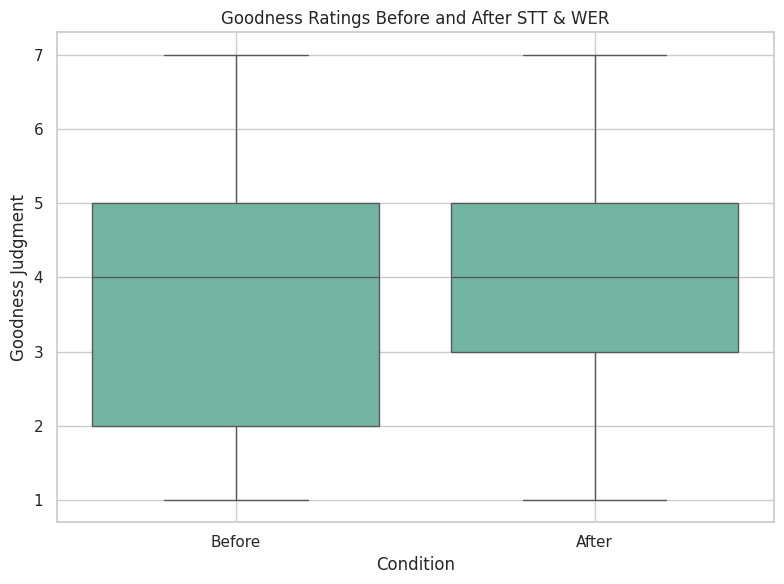

In [7]:
# ✅ Combine the two groups into a tidy DataFrame for Seaborn
df_box = pd.DataFrame({
    'Goodness': pd.concat([group1, group2], ignore_index=True),
    'Condition': ['Before'] * len(group1) + ['After'] * len(group2)
})

# ✅ Draw the boxplot using Seaborn
sns.set(style="whitegrid", palette="Set2")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condition', y='Goodness', data=df_box)
plt.title('Goodness Ratings Before and After STT & WER')
plt.ylabel('Goodness Judgment')
plt.xlabel('Condition')
plt.grid(True)
plt.tight_layout()
plt.show()

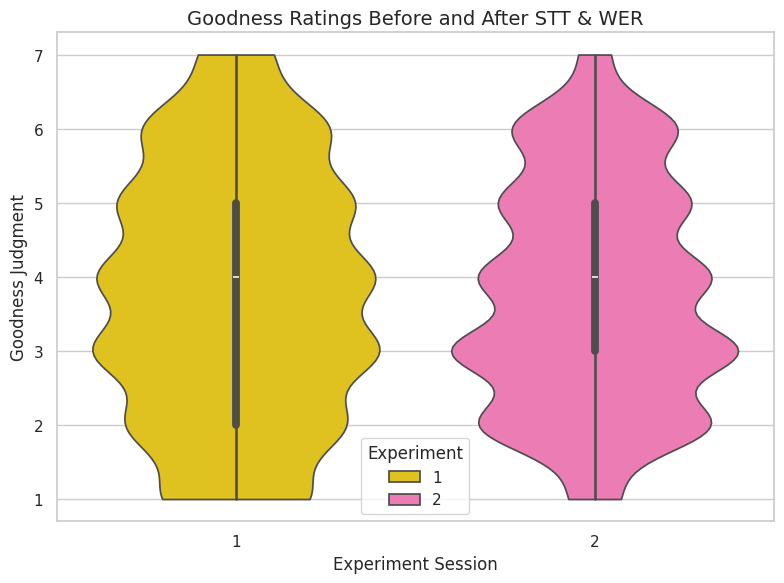

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure and axis
fig, ax4 = plt.subplots(figsize=(8, 6))

# Custom colors: Yellow for 'Before' (e.g., experiment 1), Pink for 'After' (e.g., experiment 2)
custom_palette = ['#FFD700', '#FF69B4']  # Yellow, Pink

# Violin plot
sns.violinplot(
    x='experiments',
    y='goodness',
    hue='experiments',
    data=df,
    ax=ax4,
    palette=custom_palette,
    inner='box',
    cut=0
)

# Add labels and title
ax4.set_title('Goodness Ratings Before and After STT & WER', fontsize=14)
ax4.set_xlabel('Experiment Session', fontsize=12)
ax4.set_ylabel('Goodness Judgment', fontsize=12)
ax4.legend(title='Experiment')
plt.tight_layout()
plt.show()

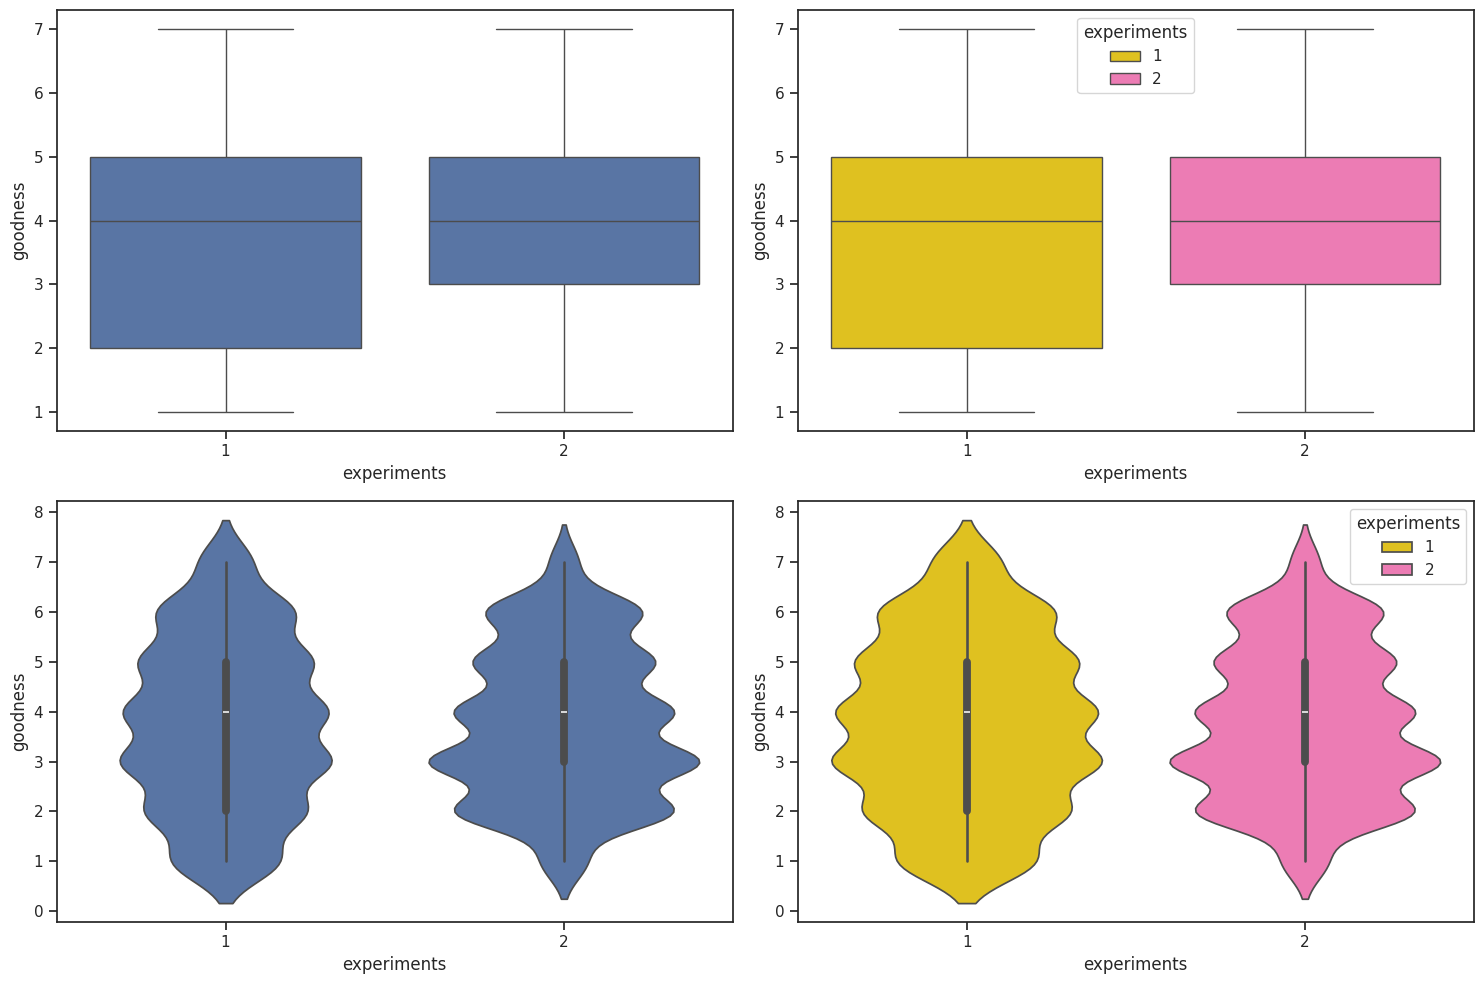

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/Phonetics/Stats_Base_MFC_Fall2024.csv')

# Convert all columns to numeric, invalid parsing will be set as NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Set visual style
sns.set_style('ticks')

# Bright custom color palette (e.g., yellow & pink)
custom_palette = ['#FFD700', '#FF69B4']  # Gold, Hot Pink

# Create subplots
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Box plot - default
sns.boxplot(x='experiments', y='goodness', data=df, ax=ax1)

# Box plot - with hue and custom colors
sns.boxplot(x='experiments', y='goodness', hue='experiments', data=df, ax=ax2, palette=custom_palette)

# Violin plot - default
sns.violinplot(x='experiments', y='goodness', data=df, ax=ax3)

# Violin plot - with hue and custom colors
sns.violinplot(x='experiments', y='goodness', hue='experiments', data=df, ax=ax4, palette=custom_palette)

plt.tight_layout()
plt.show()

#**STOP HERE**

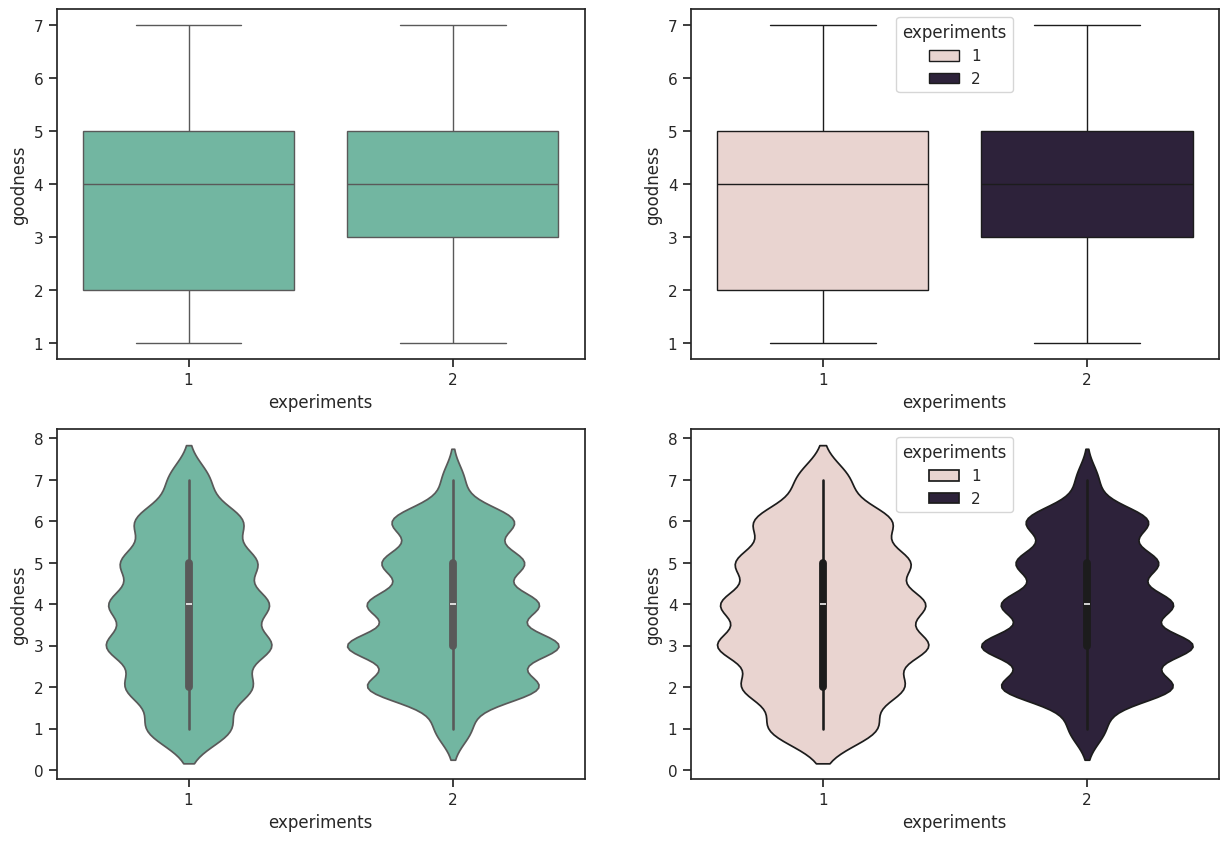

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Phonetics/Stats_Base_MFC_Fall2024.csv')

# Convert non-numeric values to NaN for all columns
df = df.apply(pd.to_numeric, errors='coerce')


#Style Theme 설정 (e.g., darkgrid, whitegrid, dark, white, ticks)
sns.set_style('ticks')

#그래프 객체 생성 (figure에 두개의 서브플랏 생성)
# In the function of subplot(a1, a2, a3), The first two arguments 2, 2 specifies a grid layout of subplots with 2 rows and 2 columns, making a total of 4 subplots.
# The third argument 1 refers to the first subplot (top-left), 2 to the second subplot (top-right), 3 to the third subplot (bottom-left), 4 to the fourth subplot (bottom-right).
fig = plt.figure(figsize = (15, 10)) #Creates a figure object of size 15 inches by 10 inches.
ax1 = fig.add_subplot(2,2,1) #Adds the first subplot to the figure at position (2, 2, 1).
ax2 = fig.add_subplot(2,2,2) #Adds the first subplot to the figure at position (2, 2, 2).
ax3 = fig.add_subplot(2,2,3) #Adds the first subplot to the figure at position (2, 2, 3).
ax4 = fig.add_subplot(2,2,4) #Adds the first subplot to the figure at position (2, 2, 4).

#Box plot - default
sns.boxplot(x = 'experiments', y = 'goodness', data=df, ax = ax1)

#Box plot - with hue
sns.boxplot(x = 'experiments', y = 'goodness', hue = 'experiments', data=df, ax = ax2)

#Violin plot - default
sns.violinplot(x = 'experiments', y = 'goodness', data=df, ax = ax3)

#Violin plot - with hue
sns.violinplot(x = 'experiments', y = 'goodness', hue = 'experiments', data=df, ax = ax4)

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon #Paired comparisons of one group with related samples (cf., Independent samples from different groups)
import matplotlib.pyplot as plt
import seaborn as sns

%cd /content/Phonetics/

# Load the data from the CSV file
data = pd.read_csv('/content/Phonetics/Stats_Base_MFC_Fall2024.csv')

# Filter operation on the DataFrame data to accesses the 'Group' column of the DataFrame, include only rows for Group 1
#then extract the 'Values' column from those rows exclusively
group1 = data[data['experiments'] == 1]['goodness']
# The same applies to rows for Group 2 and their associated values.
group2 = data[data['experiments'] == 2]['goodness']

# Perform independent two-sample t-test
t_statistic, p_value_ttest = ttest_rel(data['Before_t'], data['After_t'])






#When we use np.array and pd.DataFrame

# Example data: test scores of students before and after the program
group1 = np.array([85, 86, 88, 75, 78, 94, 90, 83, 88, 77])
group2 = np.array([87, 89, 91, 80, 80, 95, 92, 85, 89, 79])

# Convert the data to a pandas DataFrame 🚩 making a dictionary {key:value}
data = pd.DataFrame({
    'Before_t': group1,
    'After_t': group2
})

print (data)
print ('\n')

# Perform a paired t-test
t_statistic, p_value_ttest = ttest_rel(data['Before_t'], data['After_t'])

# Print the results of the paired t-test using f-strings ⤴️
print ("Ho: Students' achievements before and after the online tutorial are equal.")
print("Paired t-test results:")
print("\n", f"t-statistic: {t_statistic}") # f-string (formatted string literal) in Python.

print("For your information:")
print("1. t < 0 indicates the mean of Group1 is less than Group2.")
print("2. t > 0 indicates the mean of Group1 is greater than Group2.")
print("\n", f"p-value: {p_value_ttest}")

# Interpret the results of the paired t-test
alpha = 0.05 #Critical test threshold
if p_value_ttest < alpha:
    print("Interpretation: Students' achievements before and after the online tutorial are NOT equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Students' achievements before and after the online tutorial are equal (Fail to reject Ho (p>0.05*))")

print("\n")

# Plot the before and after score
plt.figure(figsize=(10, 6))
sns.histplot(data['Before_t'], kde=True, color='blue', label='Before', stat='density')
sns.histplot(data['After_t'], kde=True, color='orange', label='After', stat='density')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Histogram of Test Scores Before and After Program')
plt.legend()
plt.show()

In [ ]:
#When we use np.array and pd.DataFrame

# Example data: test scores of students before and after the program
group1 = np.array([85, 86, 88, 75, 78, 94, 90, 83, 88, 77])
group2 = np.array([87, 89, 91, 80, 80, 95, 92, 85, 89, 79])

# Convert the data to a pandas DataFrame 🚩 making a dictionary {key:value}
data = pd.DataFrame({
    'Before_t': group1,
    'After_t': group2
})

print (data)
print ('\n')

# Perform a paired t-test
t_statistic, p_value_ttest = ttest_rel(data['Before_t'], data['After_t'])

# Print the results of the paired t-test using f-strings ⤴️
print ("Ho: Students' achievements before and after the online tutorial are equal.")
print("Paired t-test results:")
print("\n", f"t-statistic: {t_statistic}") # f-string (formatted string literal) in Python.

print("For your information:")
print("1. t < 0 indicates the mean of Group1 is less than Group2.")
print("2. t > 0 indicates the mean of Group1 is greater than Group2.")
print("\n", f"p-value: {p_value_ttest}")

# Interpret the results of the paired t-test
alpha = 0.05 #Critical test threshold
if p_value_ttest < alpha:
    print("Interpretation: Students' achievements before and after the online tutorial are NOT equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Students' achievements before and after the online tutorial are equal (Fail to reject Ho (p>0.05*))")

print("\n")

# Plot the before and after score
plt.figure(figsize=(10, 6))
sns.histplot(data['Before_t'], kde=True, color='blue', label='Before', stat='density')
sns.histplot(data['After_t'], kde=True, color='orange', label='After', stat='density')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Histogram of Test Scores Before and After Program')
plt.legend()
plt.show()

#<font color = 'red'> **ERROR**</font> <font color = 'blue'> when I tried to do conversion and merger in sequence at the same time in one code cell ⬇️

In [6]:
#This cell is for converting multiple files to .csv format, suggested by ChatGPT

import os
import pandas as pd
from glob import glob

# 🔧 1. Set your input and output directories
input_dir = '/content/Phonetics/Data_ExperimentMFC_2'
output_dir = '/content/converted_csvs_MFC_2'
os.makedirs(output_dir, exist_ok=True)

# 🔍 2. Find all .Table files
table_files = glob(os.path.join(input_dir, '*.Table'))

# 🔁 3. Process each file
for table_path in table_files:
    try:
        # 👀 Check how many rows to skip by inspecting the file
        with open(table_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        # 🧠 Automatically find the header line (starts with quotes and tabs)
        data_start = next(i for i, line in enumerate(lines) if line.strip().startswith('"') and '\t' in line)

        # 📄 Read table using pandas
        df = pd.read_csv(table_path, sep='\t', skiprows=data_start, engine='python')

        # 📝 Extract filename and write CSV
        filename = os.path.splitext(os.path.basename(table_path))[0]
        output_path = os.path.join(output_dir, f"{filename}.csv")
        df.to_csv(output_path, index=False)
        print(f"✅ Converted: {filename}.csv")

    except Exception as e:
        print(f"⚠️ Error processing {table_path}: {e}")

⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_2_kimdohyun_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_4_DoyoonKu_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_4_Baeyejin_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_4_kimdohyun_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_3_hanseungsu_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_1_Baeyejin_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_1.kimhaneul.allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_3_Jeongjiwon_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_4_hanseungsu_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/E1_4_yunyechan_allResults.Table: 
⚠️ Error processing /content/Phonetics/Data_ExperimentMFC_1/

In [7]:
#This cell merges all .Table formatted files into one .CSV

import os
import pandas as pd
from glob import glob

# 🔧 Set input directory (where your .Table files are)
input_dir = '/content/Phonetics/Data_ExperimentMFC_1'

# 🔍 Find all .Table files
table_files = glob(os.path.join(input_dir, '*.Table'))

# 📦 Empty list to hold all DataFrames
all_dfs = []

for table_path in table_files:
    try:
        # 🧠 Read lines and find where tabular data starts
        with open(table_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        data_start = next(i for i, line in enumerate(lines) if line.strip().startswith('"') and '\t' in line)

        # 📄 Read the table from that line
        df = pd.read_csv(table_path, sep='\t', skiprows=data_start, engine='python')

        # 🏷️ Optional: Add a column for source filename
        df['Source_File'] = os.path.basename(table_path)

        # ➕ Add to the master list
        all_dfs.append(df)

    except Exception as e:
        print(f"⚠️ Error in {table_path}: {e}")

# 🧩 Merge all dataframes
if all_dfs:
    merged_df = pd.concat(all_dfs, ignore_index=True)
    output_path = '/content/combined_experimentMFC_1.csv'
    merged_df.to_csv(output_path, index=False)
    print(f"✅ All .Table files merged and saved to: {output_path}")
else:
    print("🚫 No valid .Table files found or loaded.")

⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_2_kimdohyun_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_4_DoyoonKu_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_4_Baeyejin_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_4_kimdohyun_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_3_hanseungsu_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_1_Baeyejin_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_1.kimhaneul.allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_3_Jeongjiwon_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_4_hanseungsu_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_4_yunyechan_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_2_DoyoonKu_allResults.Table: 
⚠️ Error in /content/Phonetics/Data_ExperimentMFC_1/E1_

In [8]:
import os
import pandas as pd
from glob import glob

# 🔧 Set your directory containing .Table files
input_dir = '/content/Phonetics/Data_ExperimentMFC_1'  # ← replace with your actual path
output_csv = '/content/combined_experimentMFC1.csv'

# 🔍 Get all .Table files
table_files = glob(os.path.join(input_dir, '*.Table'))

# 📦 Container for all DataFrames
all_dfs = []

# 🚀 Loop through each .Table file
for file in table_files:
    try:
        with open(file, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        # ✅ Automatically detect the header line (starts with a quote and contains tabs)
        start_line = next(i for i, line in enumerate(lines) if line.strip().startswith('"') and '\t' in line)

        # 🧾 Read the data from the start line
        df = pd.read_csv(file, sep='\t', skiprows=start_line, engine='python')

        # ➕ Add a column to track source file
        df['source_file'] = os.path.basename(file)

        # Add to list
        all_dfs.append(df)

    except Exception as e:
        print(f"⚠️ Skipped file {file} due to error: {e}")

# 🧩 Combine and export
if all_dfs:
    final_df = pd.concat(all_dfs, ignore_index=True)
    final_df.to_csv(output_csv, index=False)
    print(f"✅ Merged CSV saved to: {output_csv}")
else:
    print("🚫 No valid .Table files were processed.")

⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_2_kimdohyun_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_4_DoyoonKu_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_4_Baeyejin_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_4_kimdohyun_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_3_hanseungsu_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_1_Baeyejin_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_1.kimhaneul.allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_3_Jeongjiwon_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_4_hanseungsu_allResults.Table due to error: 
⚠️ Skipped file /content/Phonetics/Data_ExperimentMFC_1/E1_4_yunyechan_al